## Multi-agent simulations

In [2]:
import numpy as np
import tensorflow as tf
import gym
from gym import spaces
import copy

from stable_baselines.common.policies import *
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import *

In [3]:
assert tf.version.VERSION[0] == '1'

## Area generator

In [4]:
def generate_area():
    B = -10
    BORDER = [B, B, B, B, B, B]
    init_area = np.array([BORDER])
    
    for i in range(4):
        row = np.random.random_sample(4) * 6
        row = row.astype(int)
        row = np.insert(row, 0, B)
        row = np.append(row, B)
        init_area = np.concatenate((init_area, [row]))
    
    init_area = np.concatenate((init_area, [BORDER]))
    
    return init_area

## Agent definition

In [5]:
stored_maps = []

class Agent(gym.Env):
    
    def __init__(self, area):
        self.area = area
        self.reward_rangee = (0, 10)
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.MultiDiscrete(nvec=[30, 30, 30, 30, 30, 30, 30, 30, 30])
        
    def reset(self):
        self.fitness = 10
        self.position = (1, 1)
        self.reward_sum = 0
        self.area = copy.deepcopy(generate_area())
        
        return self._next_observation()
    
    def _next_observation(self):
        x, y = self.position
        visible = self.area[x-1:x+2, x-1:x+2]
        
        return visible.reshape(9)
    
    def step(self, action):
        
        reward = 0
        x, y = self.position
        
        if action < 4:
            if action == 0:
                new_y = y-1 if y>1 else y
                self.position = x, new_y
            if action == 1: 
                new_y = y+1 if y<4 else y
                self.position = x, new_y
            if action == 2:
                new_x = x+1 if x<4 else x
                self.position = new_x, y
            if action == 3:
                new_x = x-1 if x>1 else x
                self.position = new_x, y
            x, y = self.position
            self.fitness -= 1
        else:
            self.reward_sum += self.area[x, y]
            self.fitness += self.area[x, y]
            reward = self.area[x, y]
            self.area[x, y] = 0
        
        done = self.fitness <= 0
        
        obs = self._next_observation()
        
        return obs, reward, done, {}
    
    def render(self, mode='human', close=False):
        copied_map = copy.deepcopy(self.area)
        x, y = self.position
        copied_map[x,y] = -12
        stored_maps.append(copied_map)       
        print(self.reward_sum)

In [6]:
env = DummyVecEnv([lambda: Agent(generate_area())])

## Training

In [ ]:
model = A2C(MlpPolicy, env, verbose=0)
model.learn(total_timesteps=30000)

## Simulation

In [8]:
obs = env.reset()
for i in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()

0
2
2
2
2
3
3
7
7
7
7
7
7
11
11
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
15
15
15
15
15
15
15
15
15
15
15
17
17
19
19
19
19
19
19
19
19
19
19
19
19
19
22
22
22
25
25
25
25
25
25
25
28
28
28
33
33
33
33
33
33
33
33
33
33
33
33
36
36
36
36
36
36
0
1
1
1
2
2
2
2
2
2
5
5
5
8
8
10
10
11
11
11
11
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
0
3
3
3
6
6
6
6
6
6
6
6
6
6
9
9
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
17
17
19
19
19
19
19
19
19
19
19
19
19
19


## Visualization

In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from celluloid import Camera

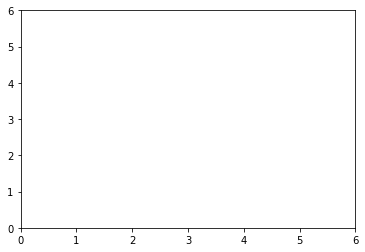

In [10]:
fig = plt.figure()
camera = Camera(fig)
for i in range(200):
    plt.pcolor(stored_maps[i])
    camera.snap()
animation = camera.animate()
animation.save('simulation4.gif', writer = 'imagemagick')